# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [43]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,RocCurveDisplay
#from sklearn.metrics import plot_confusion_matrix
#from sklearn.metrics import roc_auc_score, plot_roc_curve

In [2]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [3]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [4]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


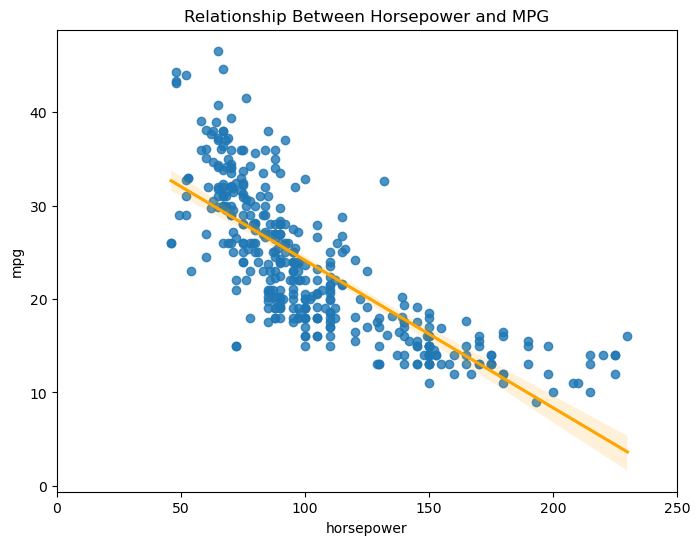

In [5]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [6]:
# call_on_students(1)

#### Answer: 

- Plot shows the error (RSS) on the y-axis and the slope of the model on the x-axis
- From this graph you can see that it arrived at about `m = -0.158` for the optimal coefficient value, since it's around that point that the error term (RSS) is smallest


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [7]:
# call_on_students(1)

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [8]:
# call_on_students(1)

#### Answer: 

- Step size captures the amount to change the coefficient as it tries to minimize the error term
- Learning rate determines how large those steps are to start
- With a lower learning rate, smaller steps


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [9]:
# call_on_students(1)

#### Answer: 

- Used for classification problems (categorical targets)
- Log-odds, which are translated into probabilities
- Linear regression predicts a continuous target, and is not bound between 0 and 1
- Parametric (if there are parameters)

If you have regularization in the model, you need to standardize. Know if I need to standardize for ridge and lasso.
Normalization: scaling things to be between 0 and 1 (more affected by outliers)
Standardization: transforming features to have a mean 0 and std 1
Regularization: 

### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [10]:
# call_on_students(1)

#### Answer: 

- Benefit: simple to interpret, fits quickly, not prone to overfitting
- Another model might be more useful if the target is imbalanced, or if there are interaction terms in the data

Could have compared to decision trees. Linear regression is like comparing apples to oranges.

## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [11]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [12]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [13]:
# call_on_students(1)

In [14]:
# Train-test split
# Set test_size=0.33 and random_state=42

X = mpg_class.drop(columns='target')
y = mpg_class['target']

#dropping target bc we want to predict it
#training on target for y

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [15]:
# Scale the data
#standardization
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [16]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [17]:
# Code to explore
y_train.value_counts(normalize=True) #would get the total count of each one if not normalized

target
0    0.744275
1    0.255725
Name: proportion, dtype: float64

#### Answer:

- Imbalanced target - 74% of training data is in class 0


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- Predicting only our majority class, 0


#### Part 3: How accurate would that baseline be on test data?


In [18]:
# Code to find the answer
y_test.value_counts(normalize=True)

target
0    0.753846
1    0.246154
Name: proportion, dtype: float64

#### Answer:

- 75% accurate on test data


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [19]:
#X

In [20]:
# call_on_students(1)
#X_train_scaled

#### Answer:

- Target is imbalanced
- To help balance: Oversampling (generating synthetic data of the underrepresented class), synthetic oversampling (SMOTE), set `class_weight`
- Note that undersampling (randomly exclude data) doesn't make sense here, since our dataset is so small


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [21]:
# call_on_students(1)

In [22]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

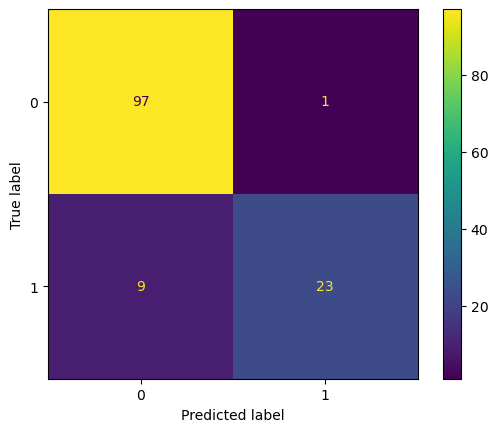

In [23]:
# Plot a confusion matrix on the test data
#plot_confusion_matrix(logreg, X_test_scaled, y_test);
ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test);
#purple is where a mistake was made--predicted 1 when 0, predicted 0 when 1

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [24]:
# call_on_students(1)

In [25]:
# Grab predictions if using sklearn functions
test_preds = logreg.predict(X_test_scaled) #x is what I predict from, y is result

In [26]:
# Accuracy
# By hand: TP + TN / TP + TN + FP + FN
accuracy = (23 + 97) / (23 + 97 + 1 + 9)
print(accuracy)

# Using sklearn
accuracy = accuracy_score(y_test, test_preds)
print(accuracy)

0.9230769230769231
0.9230769230769231


In [27]:
# Precision
# By hand: TP / TP + FP
precision = 23 / (23 + 1)
print(precision)

# Using sklearn
precision = precision_score(y_test, test_preds)
print(precision)

0.9583333333333334
0.9583333333333334


In [28]:
# Recall
# By hand: TP / TP + FN
recall = 23 / (23 + 9)
print(recall)

# Using sklearn
recall = recall_score(y_test, test_preds)
print(recall)

0.71875
0.71875


In [29]:
# F1-Score
# By hand
f1score = 2 * precision * recall / (precision + recall)
print(f1score)

# Using sklearn
f1score = f1_score(y_test, test_preds)
print(f1score)

0.8214285714285714
0.8214285714285714


### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [30]:
# call_on_students(1)

In [31]:
# Calculate roc-auc
#way to visually assess a classification model
#true positive rate: proportion of positive cases that were correctly predicted as positive
#false positive rate: proportion of negative cases that were incorrectly predicted as positive
# true on y, false on x
# Need predicted probabilities
test_probas = logreg.predict_proba(X_test_scaled)[:,1]

roc_curve(y_test, test_probas)

#you measure how good it is by the AUC, or the area under the curve, and there is a lot under the curve below so it's good

(array([0.        , 0.        , 0.        , 0.01020408, 0.01020408,
        0.03061224, 0.03061224, 0.04081633, 0.04081633, 0.06122449,
        0.06122449, 0.10204082, 0.10204082, 0.15306122, 0.15306122,
        1.        ]),
 array([0.     , 0.03125, 0.65625, 0.65625, 0.71875, 0.71875, 0.84375,
        0.84375, 0.875  , 0.875  , 0.90625, 0.90625, 0.96875, 0.96875,
        1.     , 1.     ]),
 array([           inf, 9.99491903e-01, 9.12189642e-01, 8.67061834e-01,
        5.35640605e-01, 4.56645699e-01, 3.01014639e-01, 2.81251779e-01,
        2.48720420e-01, 2.14283145e-01, 1.50974413e-01, 9.13600018e-02,
        8.11951638e-02, 6.03042137e-02, 4.31181689e-02, 3.14965465e-05]))

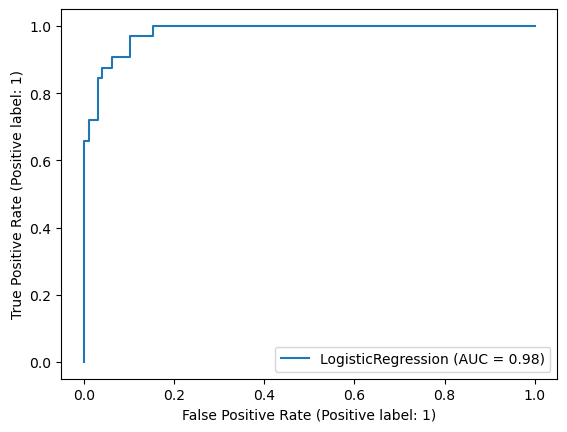

In [32]:
# Plot the ROC curve
#plot_roc_curve(logreg, X_test_scaled, y_test);
RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [33]:
# call_on_students(1)

#### Answer:

- Doing well! Very high metrics all around - more FN than FP [flaw noted in confusion matrix] (better precision than recall - FP is lower, and that is tied to precision--recall to FN) 


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [34]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

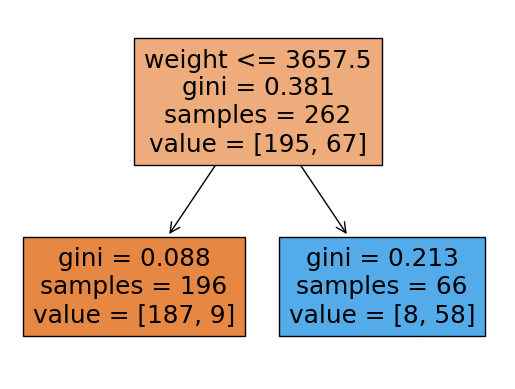

In [35]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

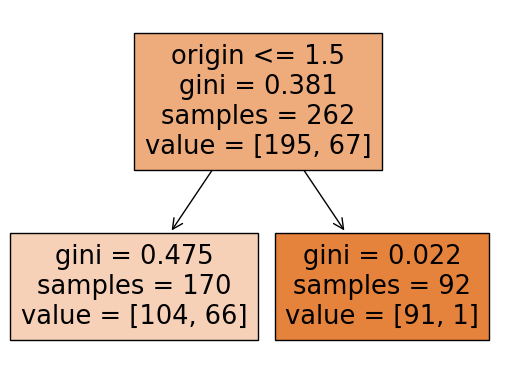

In [36]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [37]:
# call_on_students(1)

#### Answer:

- The first DT produces more pure splits, thus is doing a better job of separating the data
- Add together the two ginis and whichever one has a lower number is better.


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [38]:
# call_on_students(1)

In [39]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

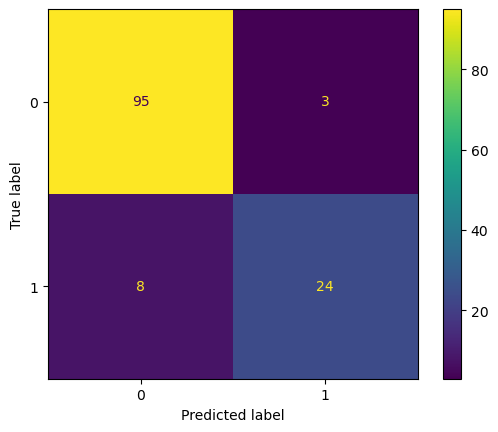

In [40]:
# Plot a confusion matrix on the test data
#plot_confusion_matrix(dt, X_test_scaled, y_test)
ConfusionMatrixDisplay.from_estimator(dt, X_test_scaled, y_test);

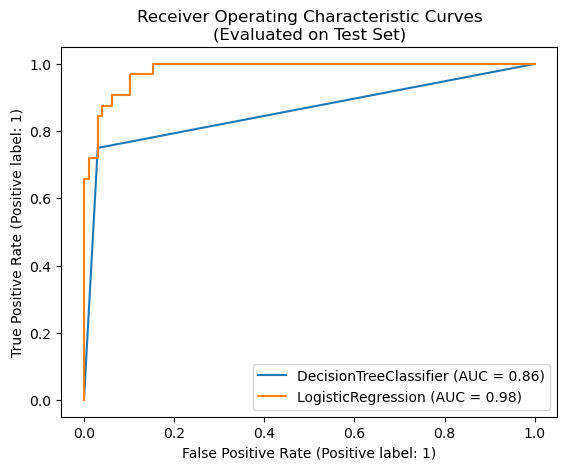

In [41]:
# Visualizing the ROCs for the models we've done
fig, ax = plt.subplots()
#plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
#plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)
RocCurveDisplay.from_estimator(dt, X_test_scaled, y_test, ax=ax)
RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test, ax=ax)
#RocCurveDisplay.from_estimator(dt, X_test, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [42]:
# call_on_students(1)

#### Answer:

- Logistic regression has the higher roc-auc score, and has more area under the curve since it's closer to the top left corner of the graph
